In [1]:
#import pandas
import pandas as pd
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv")

In [2]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [4]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Model Development and Prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [5]:
# import the class
from sklearn.linear_model import LogisticRegression




In [6]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)



C:\Users\kargu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# predict the model 
y_pred=logreg.predict(X_test)

### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. 

The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [8]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification.

You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. 

In the output, 117 and 38 are actual predictions, and 24 and 13 are incorrect predictions.

### Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

In [9]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

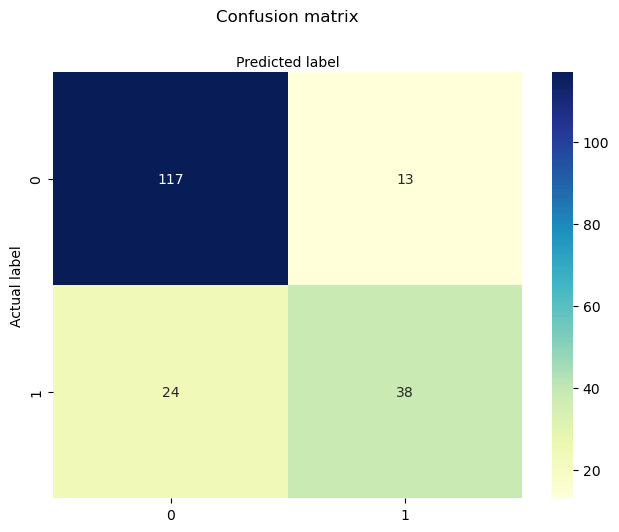

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Confusion Matrix Evaluation Metrics

Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


Well, you got a classification rate of 80%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 74% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 61% of the time.

### ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
It shows the tradeoff between sensitivity and specificity.

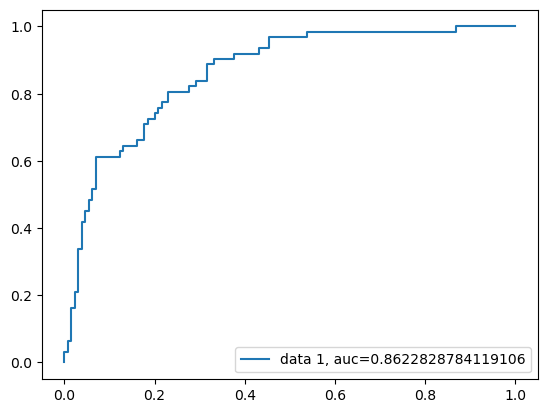

In [12]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.